In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz

In [3]:
X_level = pd.Series([1,2,3,4,5,6,7,8,9,10])
y_salary = pd.Series([45,50,60,80,11,150,200,300,500,1000])

In [5]:
X_level = level.values.reshape(-1, 1)
drtmv = DecisionTreeRegressor(random_state = 0)
drtmv.fit(X_level, y_salary)

DecisionTreeRegressor(random_state=0)

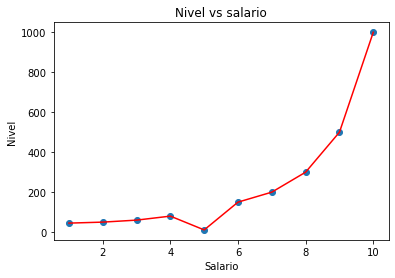

In [7]:
y_predict_salary = drtmv.predict(X_level)
plt.plot(X_level, y_predict_salary, color='red')

plt.title('Nivel vs salario')
plt.xlabel('Salario')
plt.ylabel('Nivel')
plt.scatter(X_level, y_salary)
plt.show()

In [9]:
export_graphviz(drtmv, out_file = 'tree.dot', feature_names = ['level 1'])

In [11]:
import sklearn.datasets
dsBoston = sklearn.datasets.load_boston()
dsBoston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [14]:
X_features = dsBoston.data
y_prices = dsBoston.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_prices, test_size = 0.2, random_state=42)

In [19]:
dtrmBoston = DecisionTreeRegressor()
dtrmBoston.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
y_expected = y_test
y_predicted = dtrmBoston.predict(X_test)
print('Model performance is ')
print('----------------')
print('R2 : {}'.format(metrics.r2_score(y_expected, y_predicted)))

Model performance is 
----------------
R2 : 0.6926248800927457


In [22]:
export_graphviz(dtrmBoston, out_file='treeB.dot', feature_names = dsBoston.feature_names)

In [25]:
y_predict = dtrmBoston.predict(X_features)
dfAP = pd.DataFrame({'Actual': y_prices, 'Prediccion': y_predict})
dfAP

,Actual,Prediccion
0,24.0,32.0
1,21.6,21.6
2,34.7,33.4
3,33.4,33.4
4,36.2,36.2
...,...,...
501,22.4,23.8
502,20.6,20.6
503,23.9,23.9
504,22.0,22.0


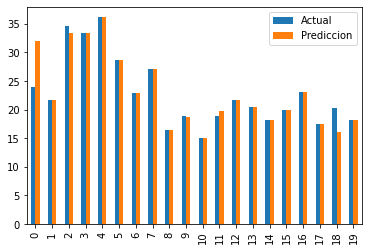

In [26]:
dfAP.head(20).plot(kind='bar')
plt.show()